In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.datasets import load_iris
from sklearn import metrics

In [2]:
# Load iris dataset

iris = load_iris()

In [3]:
# Create dataframe 

X = pd.DataFrame(data = iris.data, columns = iris.feature_names)
Y = pd.Series(data = iris.target, name = 'Class')

In [4]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
num_folds = 100
kf = KFold(n_splits = num_folds, shuffle=True)

In [6]:
def train_tree(x, y):
    tree = DecisionTreeClassifier(min_impurity_decrease=0.1)
    tree.fit(x, y)
    
    return tree

def train_knn(x, y, k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x, y)
    
    return knn

def test_model(model, x, y):
    # Predict using model
    preds = model.predict(x)
    
    # Calculate and document accuracy
    acc = round(sum(y == preds) / len(preds), 2)
    
    return preds, acc

In [7]:
# Track accuracies in each fold
tree_accs = []

max_neighbors = 50
knn_accs = {k: [] for k in range(1, max_neighbors + 1)}

In [8]:
# Loop through folds
for i, idxs in enumerate(kf.split(X, Y)):
   
    # Grab training and testing data
    train_index, test_index = idxs
    
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    # Fit a decision tree
    dec_tree = train_tree(x_train, y_train)
    
    # Test decision tree
    preds, tree_acc = test_model(dec_tree, x_test, y_test)
    
    # Document accuracy
    tree_accs.append(tree_acc)
    
    # Try KNN classifier with k vales 1-50
    for k in range(1, max_neighbors + 1): 
        knn = train_knn(x_train, y_train, k)

        # Test KNN
        preds, knn_acc = test_model(knn, x_test, y_test)

        # Document accuracy for each KNN model
        knn_accs[k].append(knn_acc)

In [9]:
# Average accuracies for each fold
for k in knn_accs.keys():
    knn_accs[k] = round(sum(knn_accs[k]) / len(knn_accs[k]), 2)

# Find best k value 
best_k = 0
best_acc = 0
for k in knn_accs.keys():
    if knn_accs[k] > best_acc:
        best_acc = knn_accs[k]
        best_k = k

In [10]:
tree_avg_acc = round(sum(tree_accs) / len(tree_accs), 2)

print('Decision tree accuracy: {}'.format(tree_avg_acc))

Decision tree accuracy: 0.94


In [11]:
print('Best K value: {}'.format(best_k))
print('KNN classifier accuracy: {}'.format(best_acc))

Best K value: 14
KNN classifier accuracy: 0.98


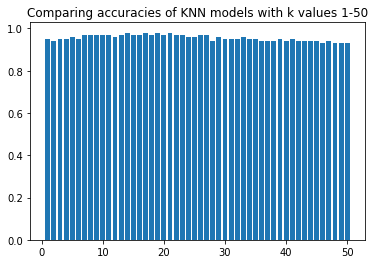

In [12]:
plt.bar(list(knn_accs.keys()), list(knn_accs.values()))
plt.title('Comparing accuracies of KNN models with k values 1-50')
plt.show()

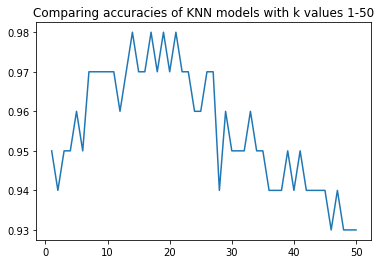

In [13]:
plt.plot(list(knn_accs.keys()), list(knn_accs.values()))
plt.title('Comparing accuracies of KNN models with k values 1-50')
plt.show()

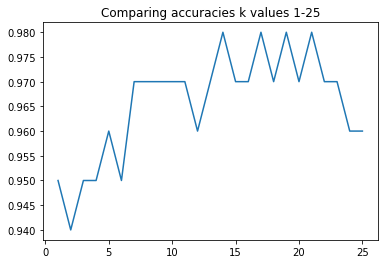

In [14]:
plt.plot(list(knn_accs.keys())[:25], list(knn_accs.values())[:25])
plt.title('Comparing accuracies k values 1-25')
plt.show()

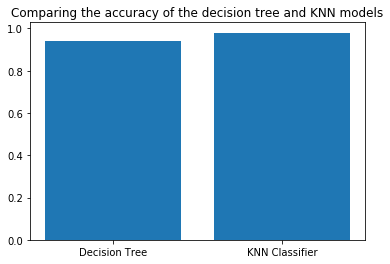

In [15]:
plt.bar(['Decision Tree', 'KNN Classifier'], [tree_avg_acc, knn_accs[best_k]])
plt.title('Comparing the accuracy of the decision tree and KNN models')
plt.show()

In [17]:
print('Tree acc: ', tree_avg_acc)
print('KNN acc: ', knn_accs[best_k])

Tree acc:  0.94
KNN acc:  0.98
